[INFO] Loaded 21 descriptor(s) from ./mapping_schemes
Selected mapping: smr_mapping_002
Score: 3
result:
{'descriptor': {'id': 'smr_mapping_002', 'sparc_id': 150, 'format': '.smr', 'parser': {'module': 'neo.io', 'class': 'Spike2IO', 'init_args': {'filename': '<filepath>'}, 'load_method': 'read_block', 'output_var': 'block', 'postprocess': <function process_smr_block at 0x0000013C4AD48A40>}, 'validation': {'required_fields': ['signals', 'time', 'sampling_frequency']}}, 'result': {'signals': array([[25.782333  , 26.02872   , 26.167313  , ..., 41.520283  ,
        41.62808   , 41.812866  ],
       [ 0.83263487,  0.80174494,  0.80174494, ...,  5.8059077 ,
         5.960357  ,  5.8522425 ],
       [ 4.8500137 ,  4.865468  ,  4.83456   , ..., -0.92981994,
        -0.9761822 , -0.945274  ],
       ...,
       [ 9.724951  ,  9.647764  ,  9.678638  , ..., 12.488231  ,
        12.472793  , 12.441918  ],
       [ 7.8569517 ,  7.8569517 ,  7.82597   , ..., 10.924114  ,
        10.924114  , 10.9550

C:\Users\MaxHaberbusch\AppData\Local\Temp\ipykernel_21080\3358246524.py:42: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
c:\Users\MaxHaberbusch\anaconda3\envs\xlstm\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


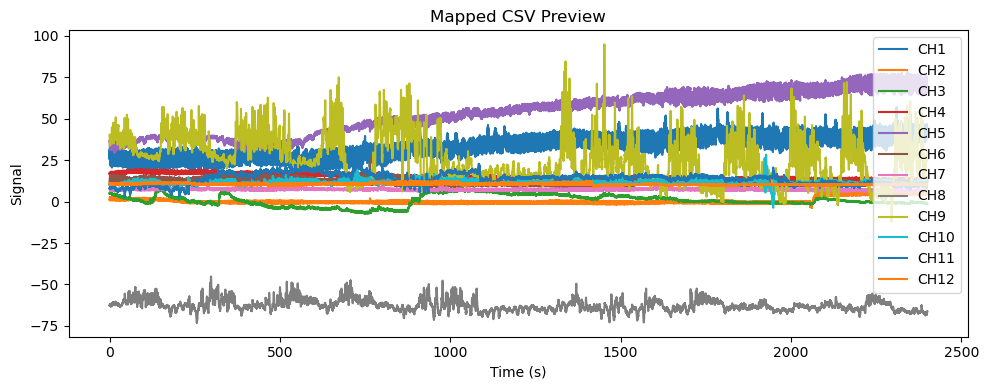

✅ Saved standardized data to: output\sub-20_CBVN-stim_4ms_5mA_PT_wAB_manometry.smr


In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 3

import matplotlib.pyplot as plt
from pathlib import Path
from utils import match_best_mapping, load_all_descriptors, save_standardized_output

# Load all descriptor files from folder
descriptors = load_all_descriptors()

# File to convert
filepath = "./downloads/sub-20_CBVN-stim_4ms_5mA_PT_wAB_manometry.smr"
filename = Path(filepath).name

# Optional: specify SPARC ID for faster mapping
# Works also without sparc_id as the mapping scheme from 150 works well on this smr file as well
result = match_best_mapping(descriptors, filepath, sparc_id=150)

# Check if mapping was successful
if result["descriptor"] is None:
    raise RuntimeError("No suitable mapping descriptor found.")

# Show mapping result
print("Selected mapping:", result['descriptor']['id'])
print("Score:", result['score'])

print("result:")
print(result)

# Preview signal
time = result['result']['time']
signals = result['result']['signals']

plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=f"CH{i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Mapped CSV Preview")
plt.legend()
plt.tight_layout()
plt.show()

# Save to standardized .npz format in ./output
output_dir = Path("./output")
output_dir.mkdir(parents=True, exist_ok=True)

output_path = output_dir / filename.replace(".csv", ".npz")

save_standardized_output(
    output_path=output_path,
    result_dict=result["result"],
    descriptor=result["descriptor"],
    original_filename=filename,
    annotations=result["result"].get("annotations", []),
    metadata_overrides=None,
    file_format="npz"
)

print(f"✅ Saved standardized data to: {output_path}")


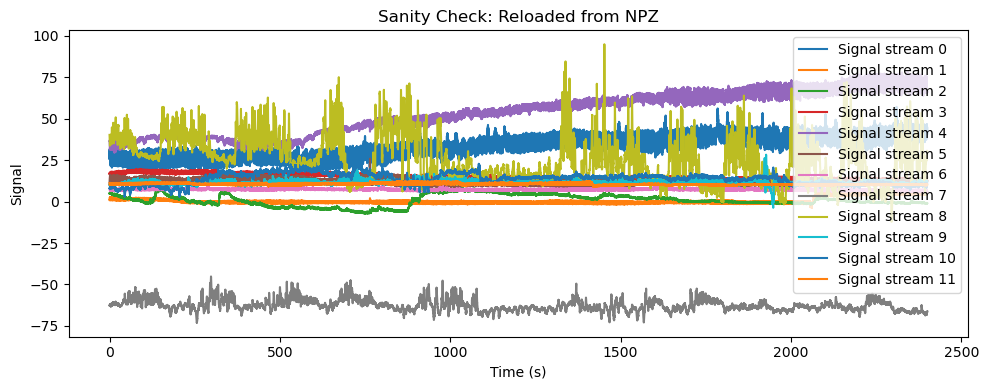

{'time_units': 'seconds', 'time_auto_generated': False, 'source_format': '.smr', 'database_id': 'unknown', 'sampling_frequency': 100.0, 'channel_names': ['Signal stream 0', 'Signal stream 1', 'Signal stream 2', 'Signal stream 3', 'Signal stream 4', 'Signal stream 5', 'Signal stream 6', 'Signal stream 7', 'Signal stream 8', 'Signal stream 9', 'Signal stream 10', 'Signal stream 11'], 'channel_units': ['unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown', 'unknown'], 'version': 'v1.0', 'upload_date': '2025-07-30', 'conversion_date': '2025-07-30', 'auto_mapped': True, 'doi': 'unknown', 'original_file_name': 'sub-20_CBVN-stim_4ms_5mA_PT_wAB_manometry.smr', 'sparc_subject_id': 'unknown', 'species': 'unknown', 'anatomical_location': 'unknown', 'modality': 'pressure', 'experimenter': ['unknown'], 'institution': 'unknown', 'sweep_mode': False, 'notes': 'Mapped using SPARCFUSE'}


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# Load the .npz file
npz_path = Path("./output/sub-20_CBVN-stim_4ms_5mA_PT_wAB_manometry.npz")
data = np.load(npz_path, allow_pickle=True)

# Extract arrays
time = data["time"]
signals = data["signals"]
metadata = data["metadata"].item()  # metadata is saved as a Python dict
channel_names = metadata.get("channel_names", [f"CH{i+1}" for i in range(len(signals))])

# Plot
plt.figure(figsize=(10, 4))
for i, ch in enumerate(signals):
    plt.plot(time, ch, label=channel_names[i])
plt.xlabel("Time (s)")
plt.ylabel("Signal")
plt.title("Sanity Check: Reloaded from NPZ")
plt.legend()
plt.tight_layout()
plt.show()

print(data['metadata'])